# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import CV_Data,EC_Data
from ec4py.ec_data_util import EC_Channels
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")




c:\Users\gusta\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE


## 3. Load in the data files

(<matplotlib.lines.Line2D at 0x168a3a43710>,
 <Axes: xlabel='Voltage (V)', ylabel='Current (A)'>)

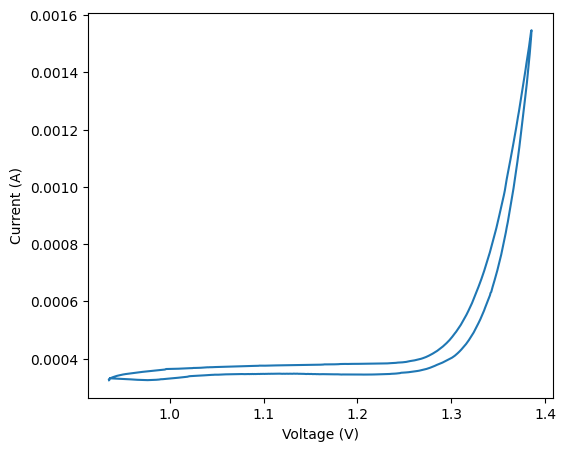

In [3]:
ec=EC_Data(paths[1])
ec.plot("E","i_4")

In [4]:
a = EC_Channels("i_0")
a.Current
a.Voltage


'E'

In [5]:
print(ec.setup)
print(ec.setup_data._setup)

{'Current Range': '10mA', 'Control Mode': 'WE', 'Cell Switch': 'TRUE', 'Start': '1.200 V', 'Start_Delay': '0.000 s', 'V1': '1.650 V', 'V2': '1.200 V', 'Rate': '0.010 V/s', 'Nr of Sweeps': '10.00', 'Method.Duration': '900.0', 'Method.Cycle Duration': '90.0', 'Method.Avg.Time': '0.1', 'AC Frequency': '5.000E+3 Hz', 'AC Amplitude': '0.0100 V', 'RHE': '-0.266 V', 'Gas': 'None', 'Temp_0': '298.15 K', 'Temp_1': '298.15 K', 'Pressure': '100000 Pa', 'Cell Material': 'Teflon', 'CounterElectrode': 'Glassy Carbon', 'Ref.Electrode': 'SCE', 'R.solution': '-1.00 Ohm', 'IR.compensation': '-1.00 Ohm', 'Electrolyte1': '0.5 M_H2SO4: H2O_75 ml', 'Electrode.Material': 'Ir', 'Electrode.Tip': '', 'Electrode.Area': '1.96E-5 m^2', 'Electrode.ExElectrode': '', 'Electrode.Cat.Loading': '0.00E+0 g m^-2', 'Electrode.Cat.Weight': '0.00E+0 g', 'Electrode.Cat.totWeight': '0.00E+0 g', 'Electrode.Cat.w%': '0.00', 'Electrode.Cat.Serial': '', 'Electrode.Cat.Batch': '', 'Electrode.Cat.Support': '', 'Electrode.Cat.Substra

[np.float64(0.0005655372425614824), np.float64(0.0005054154890235203)]


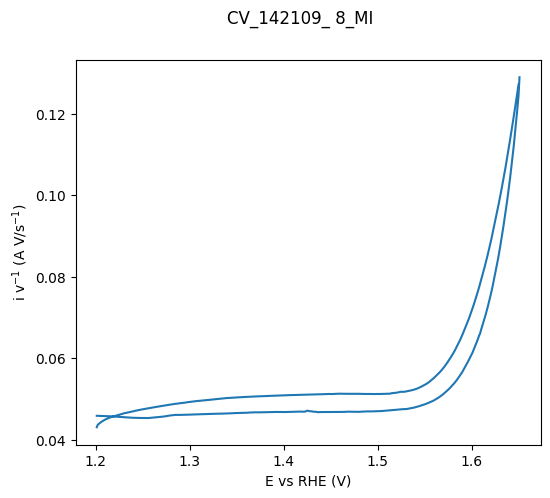

In [6]:
cv_2 = CV_Data(paths[1],"i_2")
cv_2.plot(RHE,RATE)
print(cv_2.get_i_at_E(1.3))
cv_2.rate

In [7]:
CVs = CV_Datas(paths)
for cv in CVs:
    #cv.set_area(0.04532, "cm^2")
    print("aa", cv.area)

select a current channel
select a current channel
aa 1.960e-05 m^2
aa 1.960e-05 m^2


In [8]:
CVs[1].plot(4,title = "aa")

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [ ]:
#plot = CVs.plot("" ,legend = "name", smooth_y=50)
CVs[1].plot(title = "aa")
for cv in CVs[:1]:
    print(cv.rate)
    cv2 = cv * (1 / 1000.)
    #cv2.plot()

#CVs.bg_corr(CVs)
CVs.plot(AREA, LEGEND.NAME)
CVs[0].plot(AREA, LEGEND.RATE)
bg_corr = CVs.bg_corr(path_to_dataSetFolder / "CV_144913_ 3.tdms" )

#bg_corr.plot()

## 4. Levich analysis

In [ ]:
slope1, slope2 = CVs.Levich(-0.5,"area_cm", y_smooth = 11, )
#use the argument to normalize the data

## 5. Koutechy-Levich analysis

In [ ]:
slope1, slope2 = CVs.KouLev(-0.5,"area", y_smooth = 5)
print(slope1 ** 1, slope1 ** -1)
#use the argument to normalize the data

In [ ]:
CVs[0].Tafel([-0.2, -0.1 ],-0.5)

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)


#use the argument to normalize the data

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)